<a href="https://colab.research.google.com/github/Sepali21/Finanzas-Computacionales/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller N2**

Cristian Vega 

Sebastián Párraga

**Punto 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
!pip install yfinance
import yfinance as yf
import cvxpy as cp
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


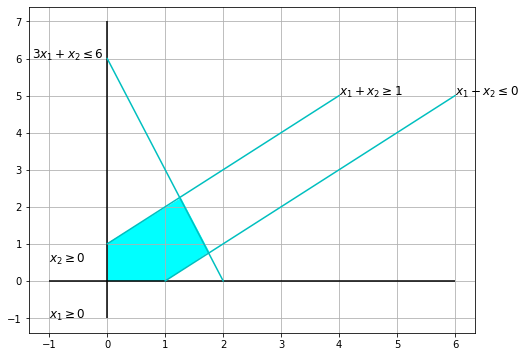

In [ ]:
#Falta modificarlo, pero es código base para el punto 1
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.hlines(0, -1, 6)
ax.vlines(0, -1, 7)
ax.plot(np.linspace(0, 4, 100), 1*np.linspace(1, 5, 100), color="c")
ax.plot(np.linspace(1, 6, 100), 1*np.linspace(0, 5, 100), color="c")
ax.plot(np.linspace(0, 2, 100), -6*np.linspace(-1, 0, 100), color="c")
ax.text(4, 5, "$x_1 + x_2 \geq 1$", size=12)
ax.text(6, 5, "$x_1 - x_2 \leq 0$", size=12)
ax.text(-1.3, 6, "$3x_1 + x_2 \leq 6$", size=12)
ax.text(-1, 0.5, "$x_2 \geq 0$", size=12)
ax.text(-1, -1, "$x_1 \geq 0$", size=12)


# Draw the feasible region
feasible_set = Polygon(np.array([[0,0],
                                 [0,1],
                                 [1.27, 2.22],
                                 [1.75,0.79],[1,0]]), 
                       color="cyan")
ax.add_patch(feasible_set)

**Punto 2**


In [ ]:

c = np.array([0.1,0.15,0.16,0.08])
A = np.array([[1,1,1,1]])
b = np.array([80])

D = np.array([[0.5,0.3,0.25,0.6],
              [0.3,0.1,0.4,0.2],
              [0.2,0.6,0.35,0.2]])
d = np.array([28,24,12])

resultado = linprog(-c,A_ub=-D,b_ub=-d,A_eq=A,b_eq=b, method='simplex')
resultado



     con: array([0.])
     fun: -10.989473684210527
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([-3.55271368e-15, -3.55271368e-15,  1.60000000e+01])
  status: 0
 success: True
       x: array([ 0.        , 12.63157895, 46.31578947, 21.05263158])

In [ ]:
T= [-resultado.fun,0,0]

k= -resultado.slack
Inversión = resultado.x
df = pd.DataFrame(Inversión, index= ['Fondo 1','Fondo 2','Fondo 3','Fondo 4']).set_axis(['Miles USD'], axis=1)
df

,Miles USD
Fondo 1,0.000000
Fondo 2,12.631579
Fondo 3,46.315789
Fondo 4,21.052632


**Analisis:**
segun los resultados del escenario de inversion de 80 millones entre los 4 fondos estudiados, el numero 3 es aquel que tiene el mayor retorno con 46.31 miles de dolares, seguido del fondo 4 con 21.05 miles de dolares, el fondo 2 con 12.63 miles de dolares y finalmente el fondo 1 sin retorno.
Con esto dicho es evidente hacia que fondo invertir a tener una posicion larga, por lo tanto el fondo 3 sera aquel que decidamos escoger.      

**Punto 3**

In [ ]:
#Construcción de vectores
b = np.array([150, 100, -200, 200, -50, -300])
c = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Función objetivo
rx = np.array([1.01])  #tasa del crédito
ry = np.array([1.02]) #Tasa del bono
rz = np.array([1.003]) #Tasa excedente
A = np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
              [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
              [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
              [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
              [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
              [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]])

#Solución con cvxpy
n = len(c) # # de elementos que requiere el vector c
x = cp.Variable(n) #Mismo tamaño de c porque se debe operar x con c

objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b, x>=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
sol = round(pd.DataFrame(x.value),4)
sol


,0
0,0.0000
1,42.6867
2,0.0000
3,0.0000
4,8.4595
5,150.0000
6,57.3133
7,195.0578
8,0.0000
9,0.0000


**Punto 4**

In [ ]:
## Estimaciones para MCO
# Información histórica para MCO
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
MCO = ["MCO"]
p_mco = yf.download(MCO,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_mco = np.log(p_mco/p_mco.shift(1)).dropna()

indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Estimación lineal
slope, intercept, r, p, std_err = stats.linregress(r_indice, r_mco)
def linestim(x):
  return intercept + slope * x

model = list(map(linestim, r_indice))

In [ ]:
# Estimacion parámetros
beta = round(slope,4)
alpha = round(intercept,4)
print('Beta MCO: ', beta )
print('Alpha MCO: ', alpha)

Beta MCO:  1.1725
Alpha MCO:  0.0068


In [ ]:
# Variables
t = len(r_indice)
unos2 = pd.DataFrame(np.repeat(1,t))
r_indice2 = pd.DataFrame(r_indice)
r_mco2 = pd.DataFrame(r_mco)
var = np.concatenate((unos2,r_indice2),1)
X = var.T @ var
Xy = var.T @ r_mco
Sol= np.linalg.solve(X,Xy)
Sol

array([0.00676426, 1.17254546])

Punto 5

In [ ]:
obj = np.array([109,94.8,99.5,93.1,97.2,92.9,110,104,102,95.2,0,0,0,0,0,0])
restr = np.array([[10,7,8,6,7,5,10,8,7,100,-1,0,0,0,0,0],
                  [10,7,8,6,7,5,10,8,107,0,-0,-1,0,0,0,0],
                  [10,7,8,6,7,5,110,108,0,0,0,0,-1,0,0,0],
                  [10,7,8,6,7,105,0,0,0,0,0,0,0,-1,0,0],
                  [10,7,8,106,107,0,0,0,0,0,0,0,0,0,-1,0],
                  [110,107,108,0,0,0,0,0,0,0,0,0,0,0,0,-1]])
rhseq = np.array([100,200,800,100,800,1200])
lim = [(0,float('inf')) for x in range(len(obj))]
opti = linprog(obj,A_eq=restr,b_eq=rhseq,bounds=lim,method='simplex')
opti

     con: array([-1.42108547e-14,  0.00000000e+00,  0.00000000e+00, -1.42108547e-14,
        0.00000000e+00, -2.27373675e-13])
     fun: 2381.1388298203824
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 0.        , 11.21495327,  0.        ,  6.80655969,  0.        ,
        0.        ,  0.        ,  6.30237008,  0.28258886,  0.        ,
       71.74111374,  0.        ,  0.        , 19.34403104,  0.        ,
        0.        ])